# Analys av Iris datasetet med TensorFlow
## Multi Layered Perceptron Classifier (MLPClassifier)
### Mål:
- Repetera Machine Learning: TensorFlow, plottning med Seaborn, Pandas etc
- Kolla om vi kan ***klassificera*** species i iris datasetet med hjälp av neuralt nätverk i TensorFlow.
- Det här är ett ***"Multi-Class Classification"*** problem, eftersom det finns tre olika species av Iris.
<br>
### Steg för steg:
- Läser in datasetet från Seaborn. OBS, samma dataset kan även importeras från SciKit-Learn, men då är X, y redan separerade (X=iris.data, y=iris.target)
- Läser in nödvändiga delar från sklearn:  
`from sklearn.model_selection import train_test_split`  
`from sklearn.metrics import accuracy_score, classification_report`  
`from sklearn.metrics import confusion_matrix`  
`import keras`
`from keras import layers`  
- Definierar X (oberoende variabler, features) och y (beroende variabel, target). Byter ut namnet på iris till 0, 1 eller 2 manuellt.  
`iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})`
- y är en one hot encoding, så den är tre outputs per rad så att säga.
- All data är numpy arrayer för att fungera med Keras
- Definierar ett model-object:  
`model = keras.Sequential([layers.InputLayer(shape=(X.shape[1],), name='input'),`  
                          `layers.Dense(10, activation='relu', name='hidden1'),`  
                          `layers.Dense(5, activation='relu', name='hidden2'),`  
                          `layers.Dense(3, activation='softmax', name='output')],`  
                          `name='iris_model')`  
- Compile the model:  
`model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])`
- Tränar modellen med .fit  
`model.fit(X_train, y_train)`
- Använder den tränade modellen för att prediktera y_pred:  
`y_pred = model.predict(X_test)`
- Evaluerar modellen:  
`print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")`  
`print("Classification Report:")`  
`print(classification_report(y_test, y_pred))`  
- Visualiserar en Confusion Matrix med Seaborn
## Noteringar / Lessons Learned
- Den förstår själv att den ska ha 4 inputs och 3 outputs. Man definierar bara hur många neurons man vill ha per hidden layer.
## Länkar:
- 

In [9]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from seaborn import load_dataset
import numpy as np
#sn.get_dataset_names() # list of available datasets

In [11]:
# load iris dataset as a pandas dataframe
iris = load_dataset('iris')

# to avoid warning on deprecated 'replace' method
pd.set_option('future.no_silent_downcasting', True)

# Replace species with numerical values
iris['species'] = iris['species'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})

# Define X and y
X = iris.drop(columns=['species'])
y = iris['species']

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One hot encoding på y_train och y_test
y_train_onehot = pd.get_dummies(y_train, dtype=int)
y_test_onehot = pd.get_dummies(y_test, dtype=int)

# convert y_train to 1D (numpy) array to work with Keras
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_onehot_np = y_train_onehot.to_numpy()
y_test_onehot_np = y_test_onehot.to_numpy()
      
# Standardize the features
scaler = StandardScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.transform(X_test_np)

Kollar hur datan ser ut:

In [19]:
print("X_train_np:")
print(X_train_np[0:3])
print("y_train_onehot_np:")
print(y_train_onehot_np[0:3])

X_train_np:
[[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]]
y_train_onehot_np:
[[1 0 0]
 [1 0 0]
 [0 1 0]]


Create the model:

In [12]:
model = keras.Sequential([layers.InputLayer(shape=(X.shape[1],), name='input'),
                          layers.Dense(10, activation='relu', name='hidden1'),
                          layers.Dense(5, activation='relu', name='hidden2'),
                          layers.Dense(3, activation='softmax', name='output')],
                          name='iris_model')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "iris_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 123 (492.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model:

In [13]:
model.fit(X_train_np, y_train_onehot_np, epochs=100, validation_split=0.2, batch_size=10, verbose=0)

Visualise training progress:

<Axes: xlabel='epochs', ylabel='loss/accuracy'>

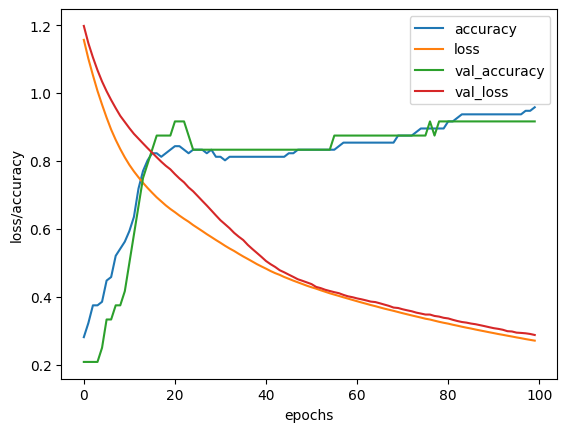

In [14]:
pd.DataFrame(model.history.history).plot(xlabel='epochs',ylabel='loss/accuracy')

Evaluate the model on the test set:

In [21]:
test_loss, test_accuracy = model.evaluate(X_test_np, y_test_onehot_np, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

Test Accuracy: 0.93
Test Loss: 0.23


Make predictions:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


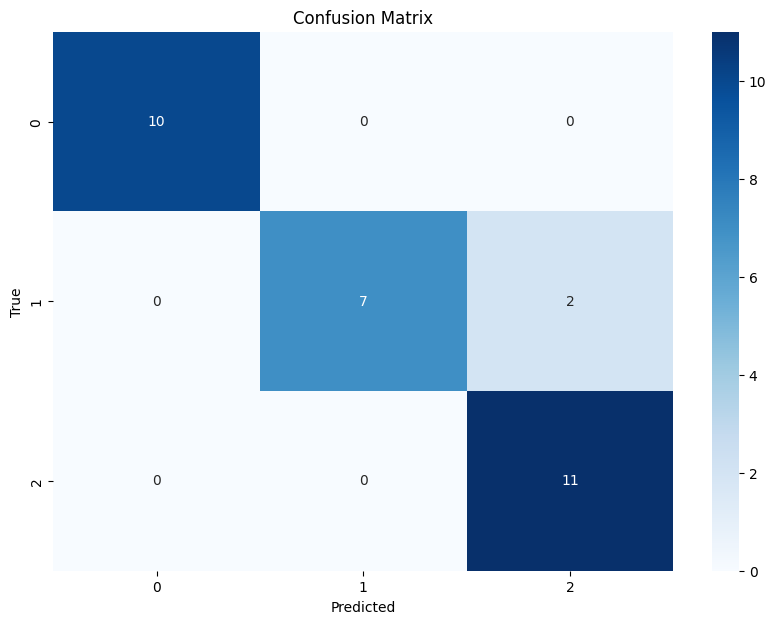

In [17]:
# Generate predictions for the test set
y_pred = model.predict(X_test_np)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test_onehot_np back to original labels
y_test_classes = np.argmax(y_test_onehot_np, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Make predictions on new data:

In [20]:
# Make predictions on new data
new_samples = np.array([[5.0, 3.6, 1.4, 0.2], [6.7, 3.0, 5.2, 2.3]])  # Example samples
new_samples_scaled = scaler.transform(new_samples)  # Standardize the new samples
predictions = model.predict(new_samples_scaled)
predicted_classes = np.argmax(predictions, axis=1)  # Get the class with the highest probability

print(f"Predicted classes: {predicted_classes}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted classes: [0 2]
